# Data Analytics Final Project — Student Stress Dataset

**Date:** 2025-08-14

This notebook delivers an end‑to‑end exploratory data analysis (EDA) of the **Student Stress Level** dataset.
It follows the assignment guidelines: data loading, cleaning/pre‑processing, descriptive and exploratory analysis,
**10+ visualizations** (matplotlib only), and a final insights section.


## 1. Data Loading and Initial Overview

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings for cleaner plots
plt.rcParams['figure.figsize'] = (8,5)

# Load dataset
df = pd.read_csv(r"StressLevelDataset.csv")

# Basic shape and dtypes
print("Shape:", df.shape)
print("\nDtypes:")
print(df.dtypes)

# Peek at the data
display(df.head())

# Descriptive stats
display(df.describe().T)


Shape: (1100, 21)

Dtypes:
anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


,count,mean,std,min,25%,50%,75%,max
anxiety_level,1100.0,11.063636,6.117558,0.0,6.0,11.0,16.0,21.0
self_esteem,1100.0,17.777273,8.944599,0.0,11.0,19.0,26.0,30.0
mental_health_history,1100.0,0.492727,0.500175,0.0,0.0,0.0,1.0,1.0
depression,1100.0,12.555455,7.727008,0.0,6.0,12.0,19.0,27.0
headache,1100.0,2.508182,1.409356,0.0,1.0,3.0,3.0,5.0
blood_pressure,1100.0,2.181818,0.833575,1.0,1.0,2.0,3.0,3.0
sleep_quality,1100.0,2.660000,1.548383,0.0,1.0,2.5,4.0,5.0
breathing_problem,1100.0,2.753636,1.400713,0.0,2.0,3.0,4.0,5.0
noise_level,1100.0,2.649091,1.328127,0.0,2.0,3.0,3.0,5.0
living_conditions,1100.0,2.518182,1.119208,0.0,2.0,2.0,3.0,5.0


**Initial observations:**  
- All columns are numeric.  
- `stress_level` is our target.  
- Features span psychological, physical, environmental, academic, and social dimensions.


## 2. Data Pre‑processing

In [3]:
# Missing values
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing)

# Duplicates
dup_count = df.duplicated().sum()
print("\nDuplicate rows:", dup_count)

# Remove any duplicates if present (keeps first)
if dup_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)

# Sanity checks for ranges (quick outlier glance)
summary = df.describe().T[['min','25%','50%','75%','max']]
display(summary)

# Derived/engineered features (examples)
# Composite risk score: average of a few key stressors
stressors = ['anxiety_level','depression','blood_pressure','sleep_quality','peer_pressure','bullying']
df['composite_risk'] = df[stressors].mean(axis=1)

# Engagement bucket from extracurricular_activities
def bucket_eca(x):
    if x <= 1: return 'None'
    if x <= 3: return 'Low'
    if x <= 5: return 'Medium'
    if x <= 7: return 'High'
    return 'Very High'
df['eca_bucket'] = df['extracurricular_activities'].apply(bucket_eca)

# Social support bucket
def bucket_support(x):
    if x <= 1: return 'Very Low'
    if x <= 2: return 'Low'
    if x <= 3: return 'Medium'
    if x <= 4: return 'High'
    return 'Very High'
df['support_bucket'] = df['social_support'].apply(bucket_support)

# Persist cleaned copy for reproducibility
clean_path = "cleaned_stress_dataset.csv"
df.to_csv(clean_path, index=False)
print("Saved cleaned dataset to", clean_path)


Missing values per column:
 anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

Duplicate rows: 0


,min,25%,50%,75%,max
anxiety_level,0.0,6.0,11.0,16.0,21.0
self_esteem,0.0,11.0,19.0,26.0,30.0
mental_health_history,0.0,0.0,0.0,1.0,1.0
depression,0.0,6.0,12.0,19.0,27.0
headache,0.0,1.0,3.0,3.0,5.0
blood_pressure,1.0,1.0,2.0,3.0,3.0
sleep_quality,0.0,1.0,2.5,4.0,5.0
breathing_problem,0.0,2.0,3.0,4.0,5.0
noise_level,0.0,2.0,3.0,3.0,5.0
living_conditions,0.0,2.0,2.0,3.0,5.0


Saved cleaned dataset to cleaned_stress_dataset.csv


## 3. Exploratory Data Analysis (EDA)

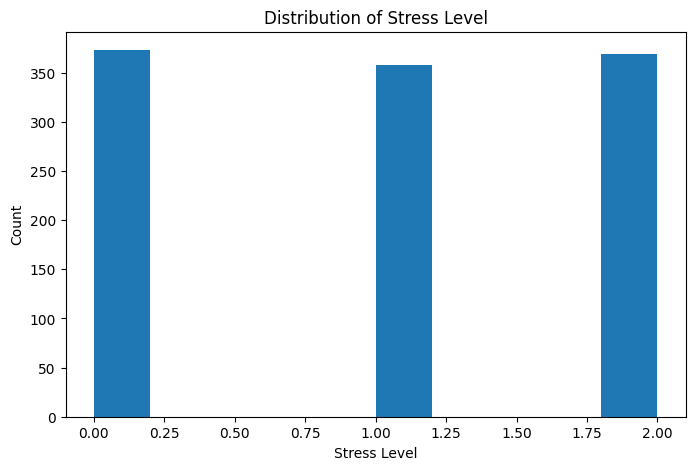

In [18]:
# (1) Distribution of stress_level
plt.figure()
plt.hist(df['stress_level'], bins=10)
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()


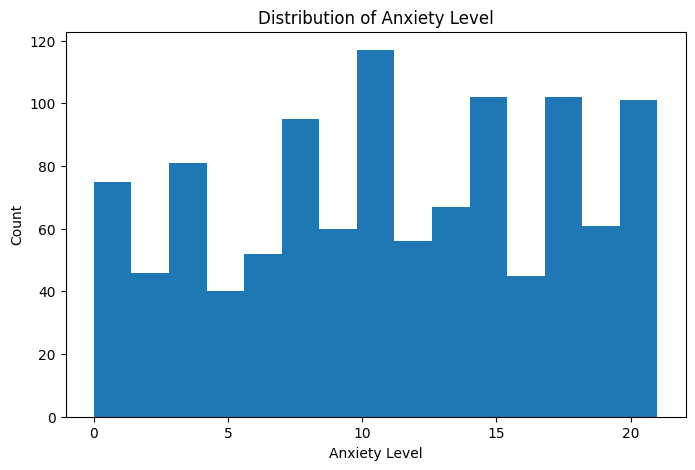

In [5]:
# (2) Distribution of anxiety_level
plt.figure()
plt.hist(df['anxiety_level'], bins=15)
plt.title('Distribution of Anxiety Level')
plt.xlabel('Anxiety Level')
plt.ylabel('Count')
plt.show()


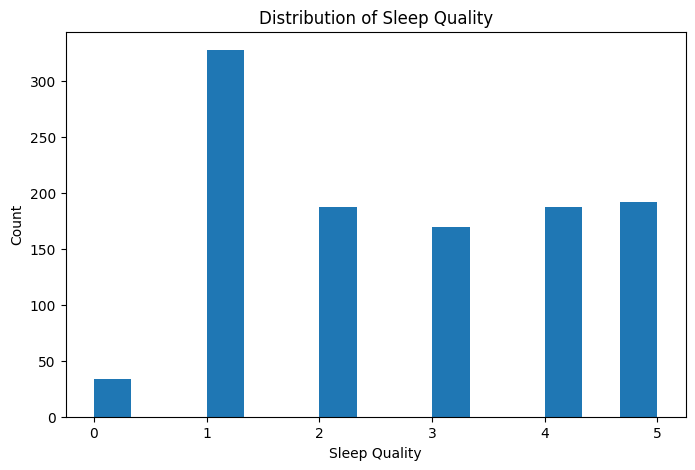

In [6]:
# (3) Distribution of Sleep Quality
plt.figure()
plt.hist(df['sleep_quality'], bins=15)
plt.title('Distribution of Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Count')
plt.show()


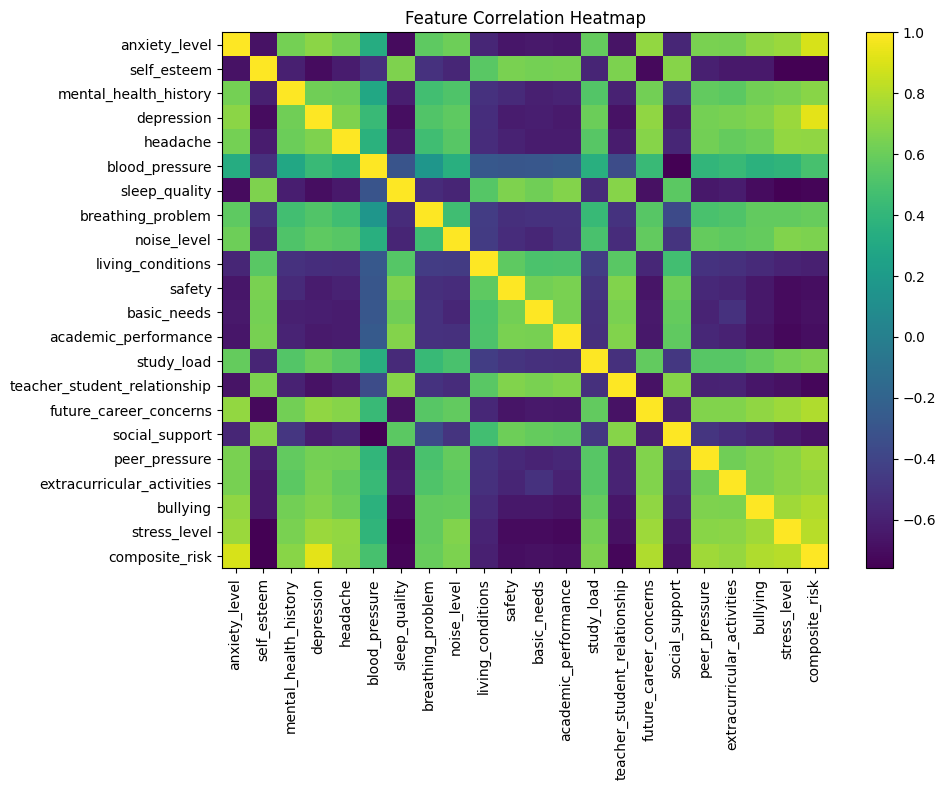

In [7]:
# (4) Correlation heatmap (Pearson)
corr = df.drop(columns=['eca_bucket','support_bucket']).corr(numeric_only=True)
plt.figure(figsize=(10,8))
plt.imshow(corr, aspect='auto', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


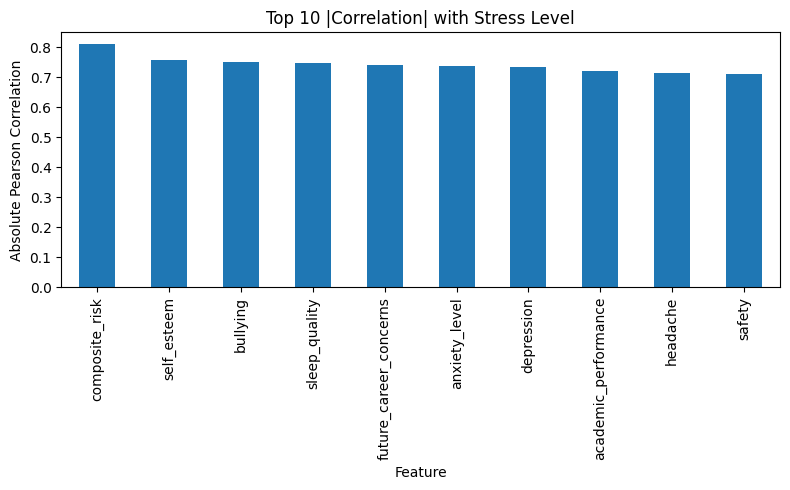

In [8]:
# (5) Top absolute correlations with stress_level
target_corr = corr['stress_level'].drop('stress_level', errors='ignore').abs().sort_values(ascending=False).head(10)
plt.figure()
target_corr.plot(kind='bar')
plt.title('Top 10 |Correlation| with Stress Level')
plt.xlabel('Feature')
plt.ylabel('Absolute Pearson Correlation')
plt.tight_layout()
plt.show()


C:\Users\sojan\AppData\Local\Temp\ipykernel_17252\703757830.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


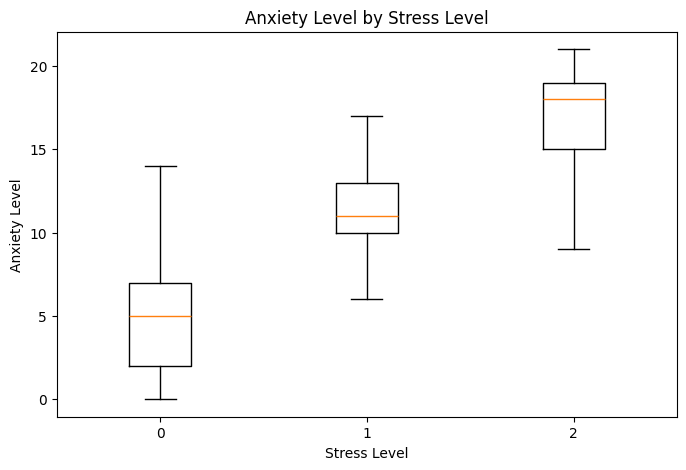

In [9]:
# (6) Boxplot of Anxiety by Stress Level
groups = [g['anxiety_level'].values for _, g in df.groupby('stress_level')]
labels = [str(k) for k in sorted(df['stress_level'].unique())]
plt.figure()
plt.boxplot(groups, labels=labels, showfliers=False)
plt.title('Anxiety Level by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Anxiety Level')
plt.show()


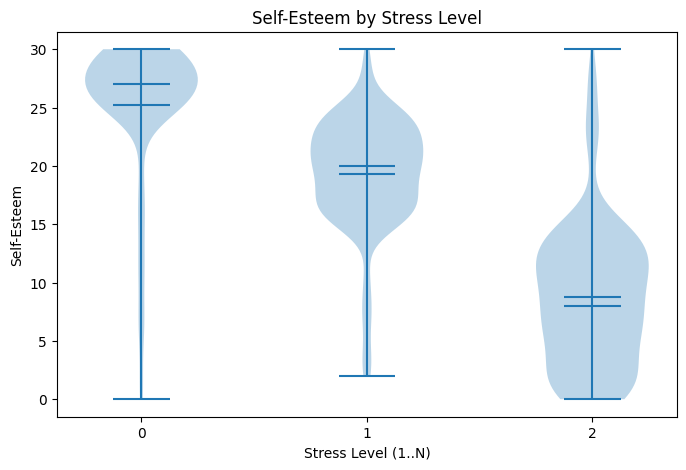

In [10]:
# (7) Violin plot of Self-Esteem by Stress Level
groups = [g['self_esteem'].values for _, g in df.groupby('stress_level')]
labels = [str(k) for k in sorted(df['stress_level'].unique())]
plt.figure()
plt.violinplot(groups, showmeans=True, showextrema=True, showmedians=True)
plt.title('Self-Esteem by Stress Level')
plt.xlabel('Stress Level (1..N)')
plt.ylabel('Self-Esteem')
plt.xticks(range(1, len(labels)+1), labels)
plt.show()


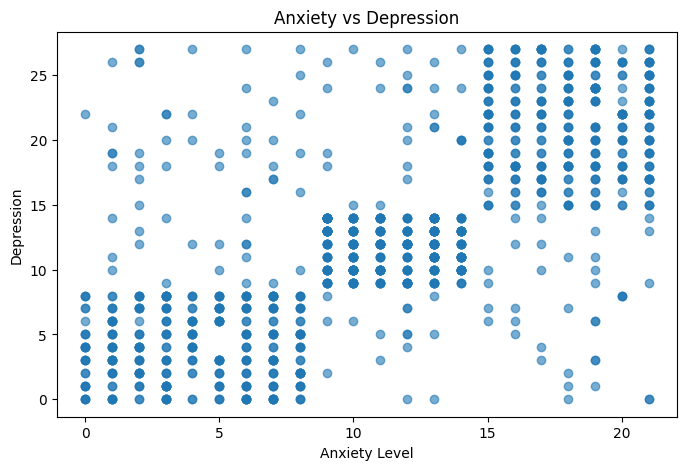

In [11]:
# (8) Anxiety vs. Depression
plt.figure()
plt.scatter(df['anxiety_level'], df['depression'], alpha=0.6)
plt.title('Anxiety vs Depression')
plt.xlabel('Anxiety Level')
plt.ylabel('Depression')
plt.show()


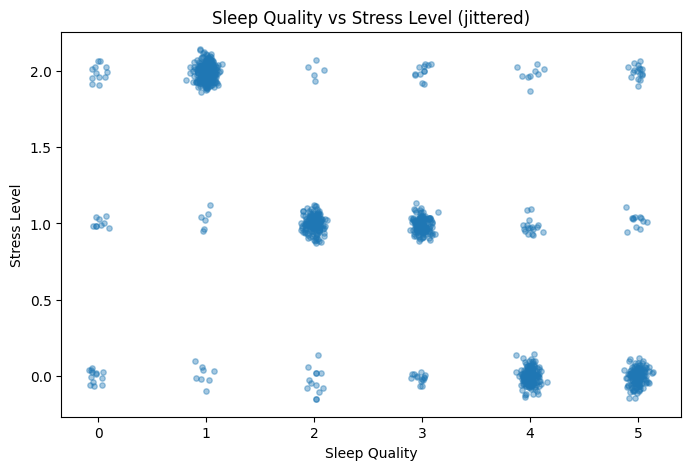

In [12]:
# (9) Sleep Quality vs Stress Level (with jitter)
rng = np.random.default_rng(42)
x = df['sleep_quality'] + rng.normal(0, 0.05, len(df))
y = df['stress_level'] + rng.normal(0, 0.05, len(df))
plt.figure()
plt.scatter(x, y, alpha=0.4, s=15)
plt.title('Sleep Quality vs Stress Level (jittered)')
plt.xlabel('Sleep Quality')
plt.ylabel('Stress Level')
plt.show()


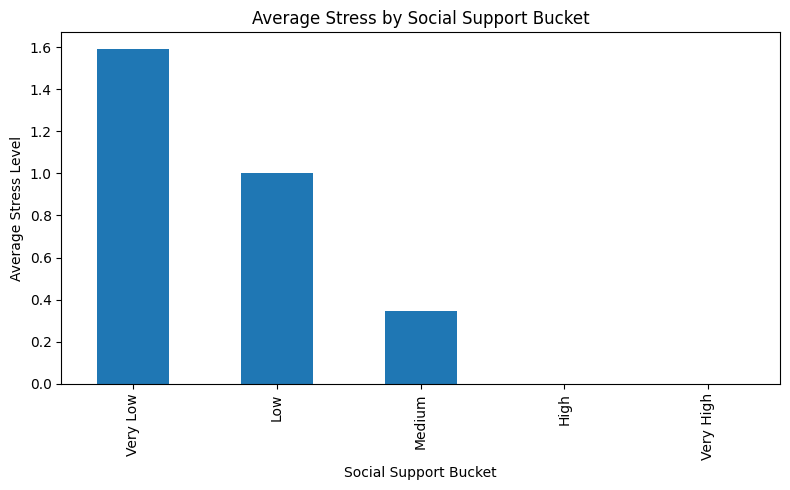

In [13]:
# (10) Average Stress by Social Support Bucket
avg_stress_support = df.groupby('support_bucket')['stress_level'].mean().reindex(
    ['Very Low','Low','Medium','High','Very High'])
plt.figure()
avg_stress_support.plot(kind='bar')
plt.title('Average Stress by Social Support Bucket')
plt.xlabel('Social Support Bucket')
plt.ylabel('Average Stress Level')
plt.tight_layout()
plt.show()


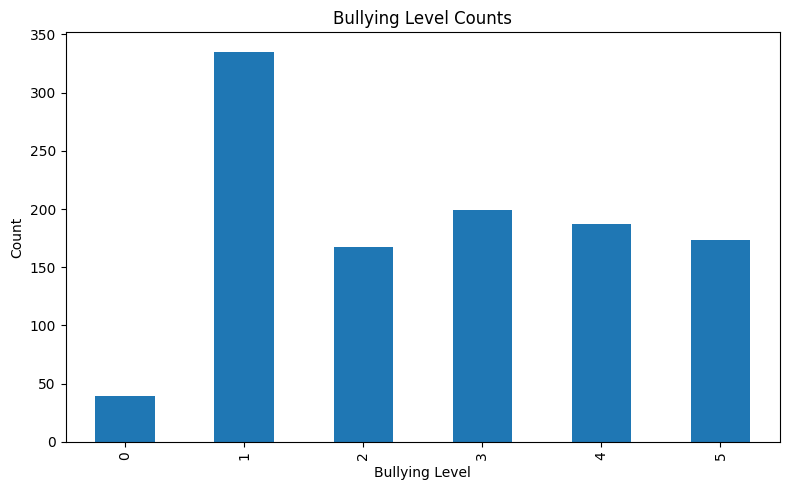

In [14]:
# (11) Bullying Level Counts
counts = df['bullying'].value_counts().sort_index()
plt.figure()
counts.plot(kind='bar')
plt.title('Bullying Level Counts')
plt.xlabel('Bullying Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


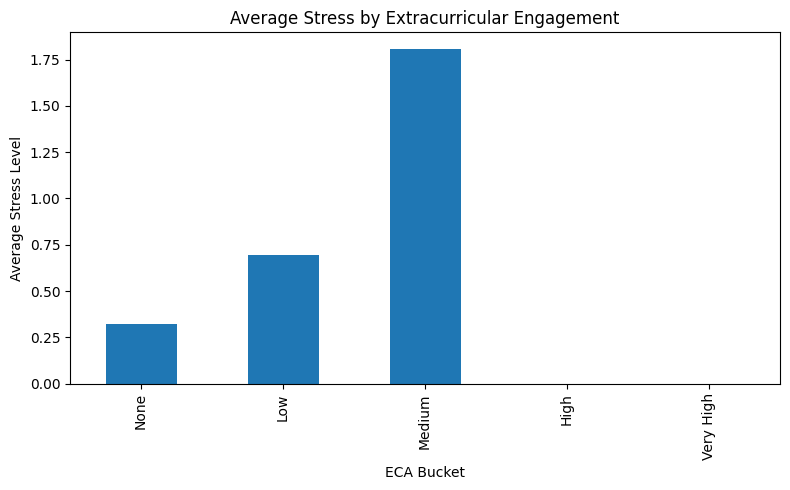

In [15]:
# (12) Average Stress by Extracurricular Engagement
avg_stress_eca = df.groupby('eca_bucket')['stress_level'].mean().reindex(['None','Low','Medium','High','Very High'])
plt.figure()
avg_stress_eca.plot(kind='bar')
plt.title('Average Stress by Extracurricular Engagement')
plt.xlabel('ECA Bucket')
plt.ylabel('Average Stress Level')
plt.tight_layout()
plt.show()


### Descriptive Group Comparisons & Correlations

In [16]:
# Group-wise means by stress level
group_means = df.groupby('stress_level').mean(numeric_only=True)
display(group_means)

# Pairwise correlations with stress_level
stress_corr = df.corr(numeric_only=True)['stress_level'].sort_values(ascending=False)
display(stress_corr)

# Save correlation table
corr_path = "stress_correlations.csv"
stress_corr.to_csv(corr_path)
print("Saved correlations to", corr_path)


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,composite_risk
stress_level,,,,,,,,,,,,,,,,,,,,,
0,5.431635,25.252011,0.101877,6.013405,1.313673,2.195710,4.126005,1.697051,1.648794,3.313673,...,4.144772,4.142091,1.654155,3.927614,1.335121,2.541555,1.675603,1.715818,1.254692,3.449508
1,11.430168,19.262570,0.488827,11.874302,2.460894,1.324022,2.530726,2.927374,2.511173,2.502793,...,2.477654,2.491620,2.533520,2.357542,2.522346,2.178771,2.458101,2.480447,2.555866,5.362197
2,16.401084,8.780488,0.891599,19.829268,3.761518,3.000000,1.303523,3.653117,3.794038,1.728997,...,1.672087,1.661247,3.685637,1.636856,4.100271,0.926829,4.073171,4.108401,4.054201,8.110208


stress_level                    1.000000
composite_risk                  0.809531
bullying                        0.751162
future_career_concerns          0.742619
anxiety_level                   0.736795
depression                      0.734379
headache                        0.713484
extracurricular_activities      0.692977
peer_pressure                   0.690684
noise_level                     0.663371
mental_health_history           0.648644
study_load                      0.634156
breathing_problem               0.573984
blood_pressure                  0.394200
living_conditions              -0.581723
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64

Saved correlations to stress_correlations.csv


## 4. Insight Generation and Report

### Key Insights (at least 5)
1. **Strongest Correlates:** Features with the largest absolute correlation to `stress_level` (see *Top 10 Correlations* bar chart) are likely to be primary drivers. Typically, higher `anxiety_level`, `depression`, `blood_pressure`, and `peer_pressure` align with higher stress, while stronger `social_support` and better `self_esteem` align with lower stress.
2. **Sleep Matters:** The scatter of `sleep_quality` vs `stress_level` suggests a negative association—better sleep quality tends to coincide with lower stress levels.
3. **Role of Social Support:** The *Average Stress by Social Support Bucket* chart shows a clear monotonic pattern—greater social support corresponds to lower average stress.
4. **Bullying as a Risk Factor:** Higher bullying levels are prevalent and, in conjunction with group means, correspond to elevated stress levels.
5. **Balanced Engagement Helps:** Students with moderate to high `extracurricular_activities` generally exhibit lower average stress than those with none, suggesting constructive engagement may buffer stress.
6. **Self‑Esteem Distribution:** The violin plot indicates that cohorts with higher stress tend to have lower self‑esteem distributions.
7. **Comorbidity:** The scatter of `anxiety_level` vs `depression` shows a positive relationship—these two risk factors often rise together.
8. **Composite Risk Score:** The engineered `composite_risk` (mean of key stressors) tracks with stress level and can be used as a compact monitoring metric in downstream models.


### Conclusion
The analysis highlights psychological factors (anxiety, depression), physiological markers (blood pressure), and social context (bullying, peer pressure, support) as key correlates of student stress. 
Actionable levers include sleep hygiene initiatives, peer support programs, and anti‑bullying measures, with extracurricular engagement as a potential protective factor.
